In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('dataset.csv')

In [3]:
# Display the last 10 rows of the dataset
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# Display a random sample of 5 rows from the dataset
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1


In [5]:
# Print the dimensions of the dataset
data.shape

(303, 14)

In [6]:
# Display concise information about the dataset's columns, data types, and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Generate descriptive statistics of the dataset's numerical columns
data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [8]:
# Missing values
# Check for missing values in the dataset and return a boolean DataFrame indicating their presence
data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Calculate and display the count of missing values in each column of the dataset
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='index'>

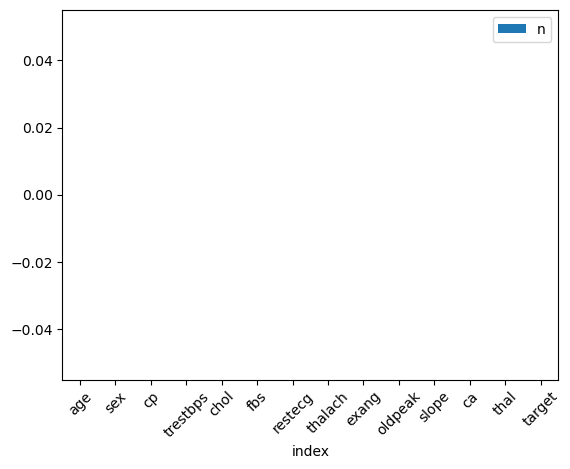

In [10]:
# Generate and display a bar plot showing the count of missing values in each column of the dataset
data.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

<Axes: xlabel='age', ylabel='Count'>

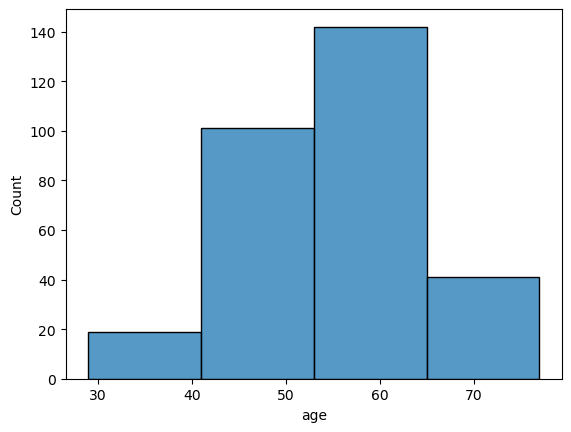

In [11]:
# Create a histogram to visualize the distribution of ages in the dataset
sns.histplot(data['age'], bins=4, kde=False)

<Axes: xlabel='sex', ylabel='count'>

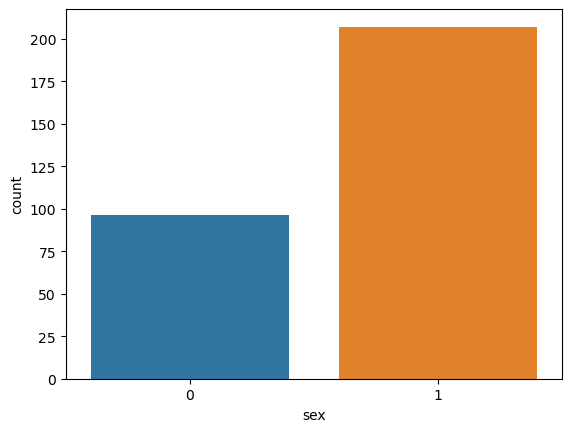

In [12]:
# Create a count plot to visualize the distribution of genders in the dataset
sns.countplot(x ='sex', data = data)

Text(0, 0.5, 'amount')

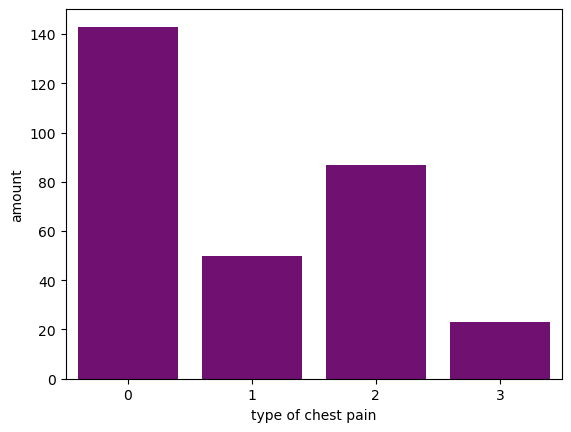

In [13]:
# Create a count plot to visualize the distribution of different types of chest pain in the dataset
cp_graph = sns.countplot(x ='cp', data = data, color='purple')
# Set the label for the x-axis
cp_graph.set_xlabel('type of chest pain')
# Set the label for the y-axis
cp_graph.set_ylabel('amount')

<Axes: >

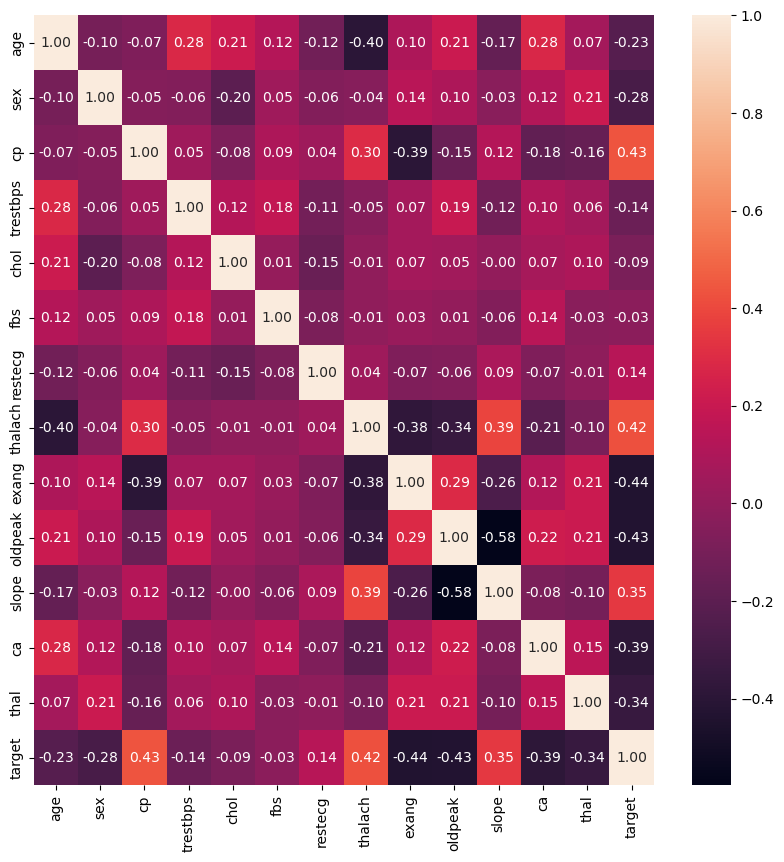

In [14]:
# Create a correlation heatmap to visualize the pairwise correlations between numerical features in the dataset
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [ ]:
#Preprocessing the data
# Display the data types of each column in the dataset
data.dtypes

In [ ]:
# Convert selected columns to the 'object' data type
# This conversion is often done for categorical variables to indicate that they are nominal or ordinal
data['sex'] = data['sex'].astype('object')
data['cp'] = data['cp'].astype('object')
data['fbs'] = data['fbs'].astype('object')
data['restecg'] = data['restecg'].astype('object')
data['exang'] = data['exang'].astype('object')
data['slope'] = data['slope'].astype('object')
data['thal'] = data['thal'].astype('object')

In [ ]:
data.dtypes

In [15]:
# Perform one-hot encoding on categorical columns to convert them into binary columns
# This creates new columns for each category in the original categorical columns
data = pd.get_dummies(data)
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# Getting features and target
X = data.drop(['target'], axis=1)
y = data['target']

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Perform standardization on the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Step 4: Train and test classification models
# Regression
regression_model = LogisticRegression()
regression_model.fit(X_train_scaled, y_train)
regression_accuracy = regression_model.score(X_test_scaled, y_test)

In [20]:
# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_scaled, y_train)
naive_bayes_accuracy = naive_bayes_model.score(X_test_scaled, y_test)

In [21]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_accuracy = knn_model.score(X_test_scaled, y_test)

In [22]:
# Step 5: Compare model results
models = ['Regression', 'Naive Bayes', 'KNN']
accuracies = [regression_accuracy, naive_bayes_accuracy, knn_accuracy]

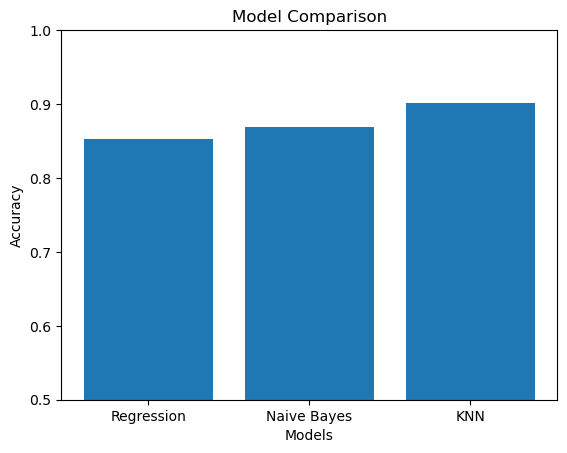

In [23]:
# Step 6: Visualize comparing results
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.5, 1.0)
plt.show()

In [24]:
# Generating classification reports and confusion matrices
regression_report = classification_report(y_test, regression_model.predict(X_test_scaled))
naive_bayes_report = classification_report(y_test, naive_bayes_model.predict(X_test_scaled))
knn_report = classification_report(y_test, knn_model.predict(X_test_scaled))

In [25]:
print("Regression Model Report:\n")
regression_report

Regression Model Report:



'              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.85        29\n           1       0.87      0.84      0.86        32\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n'

In [26]:
print("\nNaive Bayes Model Report:\n")
naive_bayes_report


Naive Bayes Model Report:



'              precision    recall  f1-score   support\n\n           0       0.84      0.90      0.87        29\n           1       0.90      0.84      0.87        32\n\n    accuracy                           0.87        61\n   macro avg       0.87      0.87      0.87        61\nweighted avg       0.87      0.87      0.87        61\n'

In [27]:
print("\nk-Nearest Neighbors Model Report:\n")
knn_report


k-Nearest Neighbors Model Report:



'              precision    recall  f1-score   support\n\n           0       0.87      0.93      0.90        29\n           1       0.93      0.88      0.90        32\n\n    accuracy                           0.90        61\n   macro avg       0.90      0.90      0.90        61\nweighted avg       0.90      0.90      0.90        61\n'

In [28]:
# Generating confusion matrices
regression_confusion = confusion_matrix(y_test, regression_model.predict(X_test_scaled))
naive_bayes_confusion = confusion_matrix(y_test, naive_bayes_model.predict(X_test_scaled))
knn_confusion = confusion_matrix(y_test, knn_model.predict(X_test_scaled))

In [29]:
regression_confusion

array([[25,  4],
       [ 5, 27]], dtype=int64)

In [30]:
naive_bayes_confusion

array([[26,  3],
       [ 5, 27]], dtype=int64)

In [31]:
knn_confusion

array([[27,  2],
       [ 4, 28]], dtype=int64)